In [2]:
import speech_recognition as sr
import numpy as np
import os
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot 
import dtw
import matplotlib.pyplot as plt
import librosa
import IPython.display
%matplotlib inline
from IPython.display import Image

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [4]:
r = sr.Recognizer() 

In [5]:
dirListing = os.listdir("E:\\speech_recognition\\")
editFiles = []
for item in dirListing:
    if ".wav" in item:
        editFiles.append("E:\\speech_recognition"+'\\'+item)
print(editFiles)

['E:\\speech_recognition\\1.wav', 'E:\\speech_recognition\\10.wav', 'E:\\speech_recognition\\2.wav', 'E:\\speech_recognition\\3.wav', 'E:\\speech_recognition\\4.wav', 'E:\\speech_recognition\\5.wav', 'E:\\speech_recognition\\6.wav', 'E:\\speech_recognition\\7.wav', 'E:\\speech_recognition\\8.wav', 'E:\\speech_recognition\\9.wav', 'E:\\speech_recognition\\salam.wav', 'E:\\speech_recognition\\salam2.wav']


In [6]:
my_audio = []
audio = []
for i in range(10):
    path = editFiles[i]
    my_audio.append(sr.AudioFile(path))
    with my_audio[i] as source:
        audio.append(r.record(source))

In [17]:
for i in range(10):
    r.recognize_google(audio[i], language="fa_IR")
r.recognize_google(audio[0], language="fa_IR")

RequestError: recognition request failed: Bad Request

C:\Users\hp\AppData\Local\Temp\ipykernel_7640\1724769117.py:24: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)


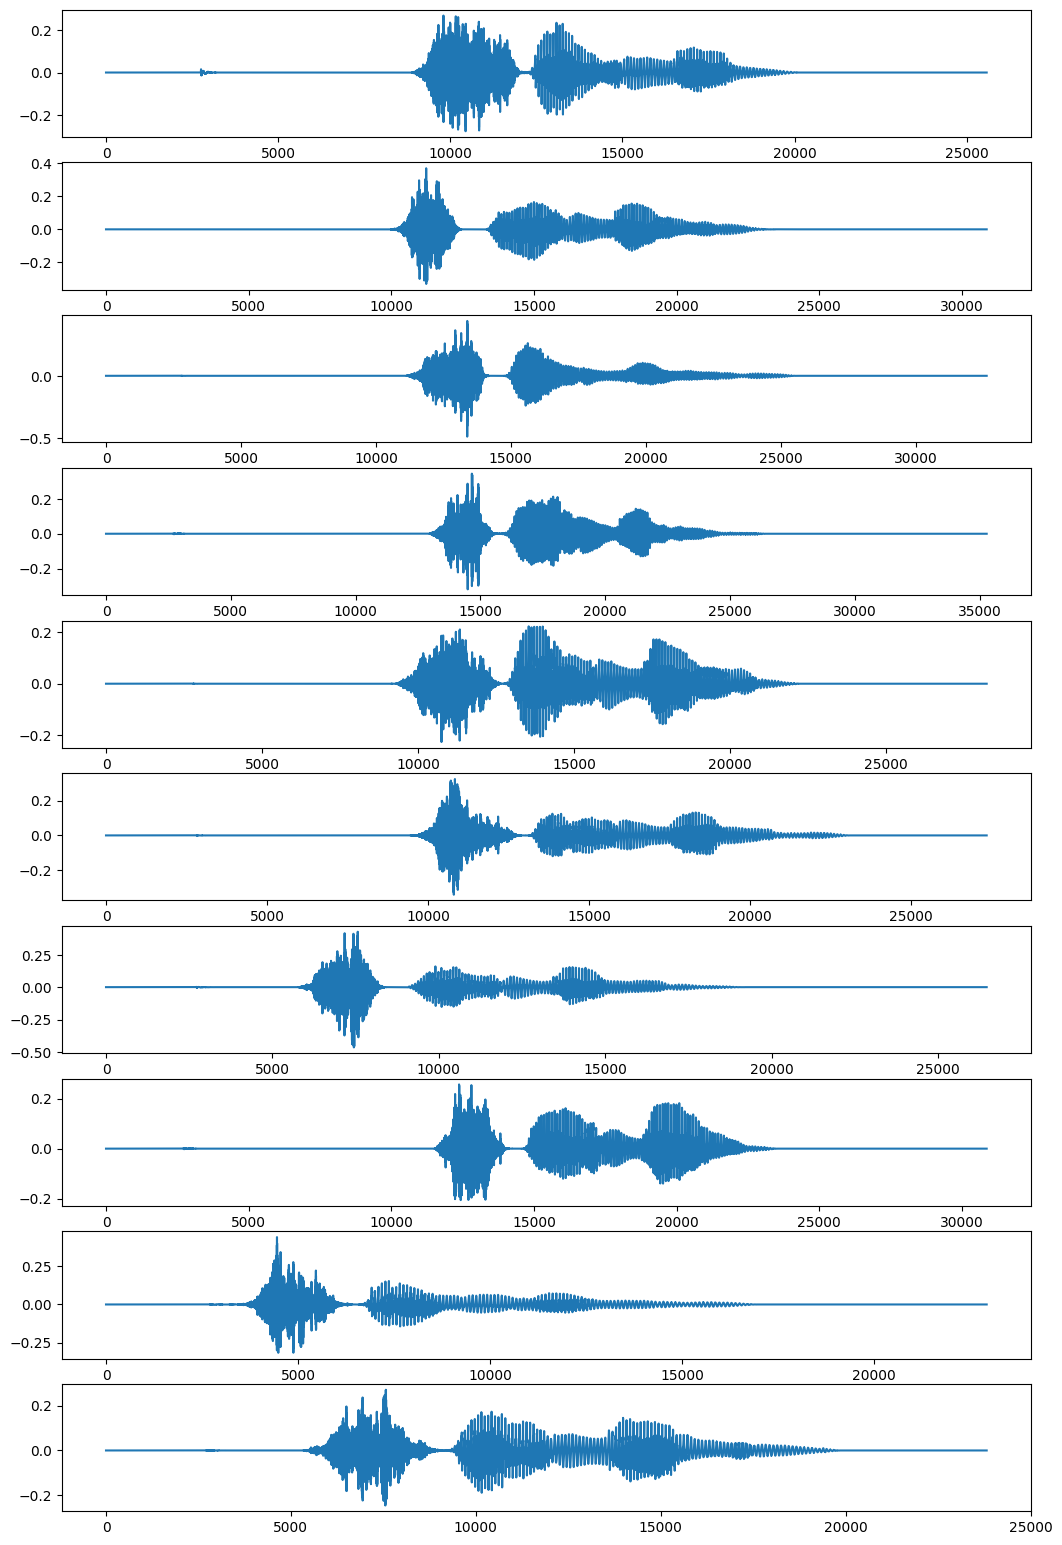

In [9]:
train_audio = []
sr_arr = []
mfcc_train = []
for i in range(10):
    
    #define variable to save data and rate audio
    path = editFiles[i]
    y, sr = librosa.load(path)
    
    #resize each figure to show better
    fig = plt.gcf()
    fig.set_size_inches(12.5, 19.5)
    
    #show matplotlib speek
    plt.subplot(10, 1, i+1)
    plt.plot(y)
    IPython.display.Audio(data=y, rate=sr)
    
    #Add data to train list:
    train_audio.append(y)
    sr_arr.append(sr)
    
    #Convert the data to mfcc:
    mfccTest = librosa.feature.mfcc(y,sr)
    mfcc_train.append(mfccTest)

In [10]:
print(mfcc_train)


[array([[-7.35803284e+02, -7.35803284e+02, -7.35803284e+02,
        -7.35803284e+02, -5.77443359e+02, -4.39900635e+02,
        -4.46852722e+02, -6.10210205e+02, -7.35803284e+02,
        -7.35803284e+02, -7.35803284e+02, -7.35803284e+02,
        -7.35803284e+02, -7.35803284e+02, -7.35803284e+02,
        -7.35803284e+02, -7.10214600e+02, -5.45738892e+02,
        -4.53109650e+02, -4.12032990e+02, -4.11613831e+02,
        -4.44030975e+02, -4.61132324e+02, -3.41965851e+02,
        -2.73951752e+02, -2.96385803e+02, -3.08958344e+02,
        -3.53202789e+02, -4.21468018e+02, -4.63885620e+02,
        -5.01360352e+02, -4.66185333e+02, -3.99555908e+02,
        -3.86689270e+02, -4.11874939e+02, -4.46875610e+02,
        -4.84994446e+02, -5.57152405e+02, -5.89746033e+02,
        -6.17160950e+02, -6.97825073e+02, -7.35803284e+02,
        -7.35803284e+02, -7.35803284e+02, -7.35803284e+02,
        -7.35803284e+02, -7.35803284e+02, -7.35803284e+02,
        -7.35803284e+02, -7.35803284e+02],
       [ 0.0

In [11]:
import copy
def preprocess_mfcc(mfcc_test):
    mfcc_cp = copy.deepcopy(mfcc_test)
    for i in range(len(mfcc_test[1])):
        mfcc_cp[:,i] = mfcc_test[:,i] - np.mean(mfcc_test[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp
mfcc_final = []
for i in range(10):
    mfcc_final.append(preprocess_mfcc(mfcc_train[i]))
    
mfcc_final

[array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+0

C:\Users\hp\AppData\Local\Temp\ipykernel_7640\3377615961.py:8: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(yTest,srTest)


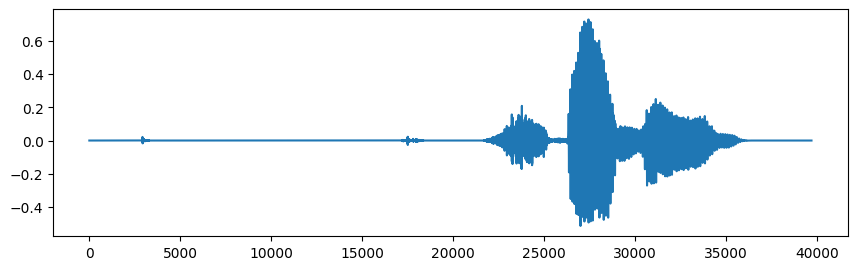

In [12]:
# add test audio
fig = plt.gcf()
fig.set_size_inches(10.25, 2.95)
yTest, srTest = librosa.load('salam2.wav')
plt.plot(yTest)

#Convert the data to mfcc:
mfccTest = librosa.feature.mfcc(yTest,srTest)
mfccTest = preprocess_mfcc(mfccTest)

In [13]:
len(mfcc_final[1])

20

In [14]:
from dtw import *

window_size = []
dists = []
dists_secondary = []
for i in range(len(mfcc_final)):
    window_elemnts = len(mfcc_final[i][-1])
    dist = np.zeros(mfccTest.shape[1] - window_elemnts)
    window_size.append(window_elemnts)
    dists.append(dist)
    
    for j in range(len(dists)):
        mfcci = mfccTest[:,j:j+window_size[j]]
        dists_temp = dtw(mfcc_final[j].T, mfcci.T,keep_internals=True)
        dists_secondary.append(dists_temp)
           
    
    dists_secondary[j].plot(type="threeway")
    
#plt.plot(dists_temp)

print(dists_secondary[1])

TypeError: 'module' object is not callable

In [15]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
temp = []
for i in range(len(mfcc_final)):
    for j in range(len(mfcc_final[i])):
        temp.append(dtw.distance(mfcc_final[i][i], mfcc_final[i][j]))
    path_between_my_voice = np.array(temp)
    

path_between_my_voice = np.reshape(path_between_my_voice,(10,20))


print(path_between_my_voice)

ModuleNotFoundError: No module named 'dtaidistance'

In [16]:
temp = []
for i in range(len(mfcc_final)):
    for j in range(len(mfcc_final[i])):
        temp.append(dtw.distance(mfcc_final[i][i], mfccTest[j]))
    path_between_me_aother_voice = np.array(temp)
    
path_between_me_aother_voice = np.reshape(path_between_me_aother_voice,(10,20))


print(path_between_me_aother_voice)

AttributeError: module 'dtw' has no attribute 'distance'